# Time Series Analysis and Decomposition of Stock Prices with Python

## 1. Importing the libraries

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



## 2. Define Stock-related Parameters 
__Use Case:__ Specifies the stock symbol (e.g., ‘AAPL’ for Apple) and the time range (start and end dates) for which historical stock price data will be downloaded.

In [2]:
stock = 'AAPL'
start = '2022-01-01'
end = '2023-12-31'

## 3. Download Historical Stock Price Data
__Use Case:__ Uses the `yfinance` library to download historical stock price data for the specified stock symbol and time range. The data is stored in a Pandas DataFrame (`df`).

In [3]:
df = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


## 4. Get Familiar with Dataset

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.953857,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.669983,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.943970,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.056976,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.225037,86709100


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,163.512276,165.365749,161.818343,163.674351,162.803893,7.359234e+07
std,17.739105,17.436476,17.967710,17.703835,17.911213,2.536511e+07
min,126.010002,127.769997,124.169998,125.019997,124.325073,2.404830e+07
25%,148.869995,150.919998,147.240005,149.350006,148.308380,5.414710e+07
50%,164.589996,166.330002,162.949997,165.020004,163.720093,6.924600e+07
75%,176.479996,177.990005,174.820007,176.279999,175.848328,8.670910e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.826020e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       501 non-null    float64
 1   High       501 non-null    float64
 2   Low        501 non-null    float64
 3   Close      501 non-null    float64
 4   Adj Close  501 non-null    float64
 5   Volume     501 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.4 KB


In [7]:
df.shape

(501, 6)

In [8]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
df.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=501, freq=None)

## 5. Visualize Historical Stock Price Data
__Use Case:__ Plots the time series of the closing stock prices over the specified time range using Matplotlib, providing a visual representation of the stock price trends.

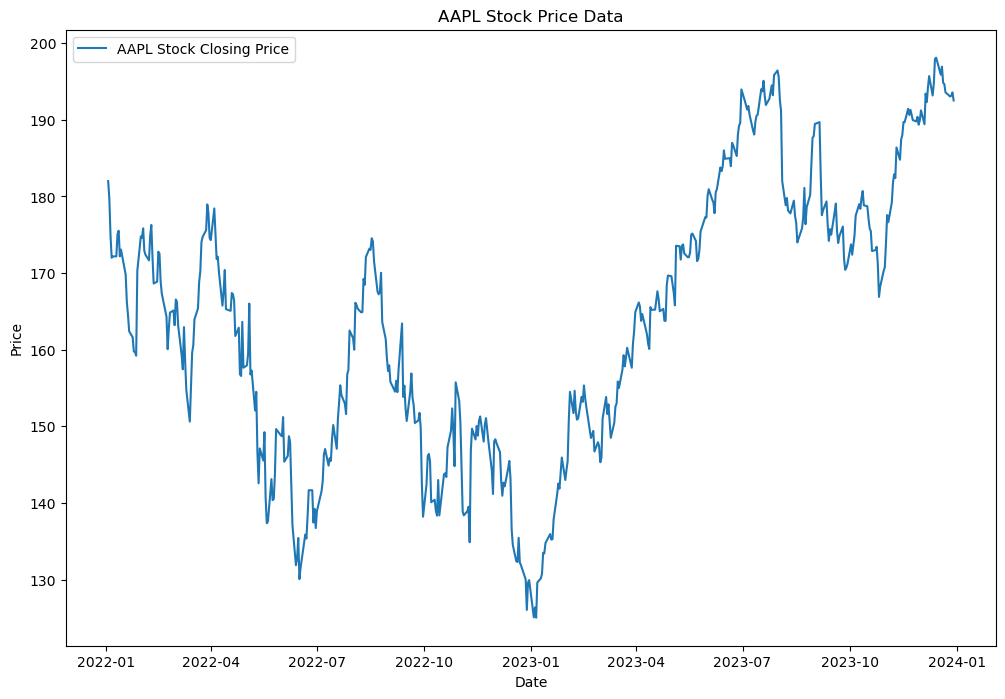

In [10]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df['Close'], label=f'{stock} Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock} Stock Price Data')
plt.legend()
plt.show()

## 6. Time Series Decomposition of Stock Prices
__Use Case:__ Uses the `seasonal_decompose()` function from the `statsmodels` library to decompose the time series of the closing stock prices into three components: trend, seasonality, and residuals. The resulting components are stored in a `decomposed` variable.

In [11]:
result = seasonal_decompose(df['Close'], model='additive', period=1)

## 7. Visualize Time Series Decomposition
__Use Case:__ Plots the time series of the closing stock prices, the trend component, the seasonal component, and the residual component using Matplotlib, providing a visual representation of the decomposition of the stock price time series.

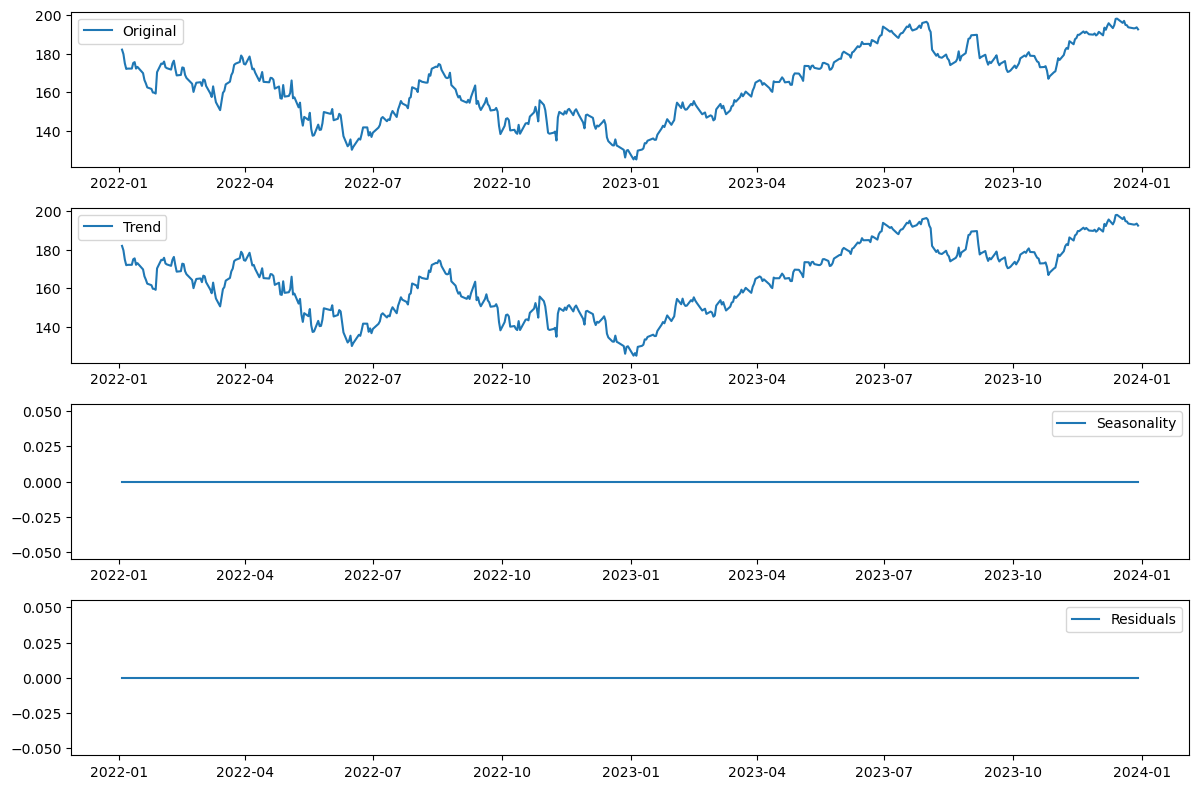

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df.index, df['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(df.index, result.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(df.index, result.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(df.index, result.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
